# Credit Card Fraud Detection

# We are implementing the **PACE** methodology which acts as a framework to simplify the process of building a machine learning model , 
# PACE classify the whole project to 4 stages :
  - ### Plan
  - ### Analyze
  - ### Construct
  - ### Execute

## **Pace: Plan**

###  The business scenario and problem

In today's digital landscape, financial institutions face significant challenges in mitigating fraudulent activities. The rise of online transactions and electronic payments has increased the complexity and frequency of fraudulent behavior. Detecting and preventing fraudulent transactions is crucial to safeguarding both the institution's assets and maintaining customer trust.

For this project, we are partnering with **Guardian Banking Systems** , a leading financial institution committed to providing secure and reliable services to its customers. The primary goal is to leverage machine learning techniques to develop an effective fraud detection system that can identify potentially fraudulent transactions in real-time.

The objective of this project is to build a robust machine learning model capable of detecting fraudulent transactions accurately and efficiently. The model will analyze historical transaction data to identify patterns and indicators associated with fraudulent behavior. The key challenges and objectives include:

1. Data Imbalance: The dataset is expected to have a significant class imbalance, with a vast majority of transactions being legitimate and only a small fraction being fraudulent. Handling this imbalance is critical to ensure that the model does not become biased towards the majority class.
2. Real-time Detection: The model needs to make predictions in real-time as transactions occur, requiring efficient feature engineering and model deployment to ensure low latency.
3. Accuracy and Interpretability: The model must strike a balance between high accuracy in identifying fraudulent transactions and providing explainability of its decisions. It's essential for investigators to understand the factors contributing to a transaction being flagged as fraudulent.
4. daptability to Changing Patterns: Fraudulent behaviors evolve over time, and the model should be adaptable to new types of fraud as they emerge, without requiring constant retraining.

###  Evaluation Metric

Now which of these accuracy measures should we care about ? it depends on what we want the model to achieve.

**Accuracy** is a straight forward metric , but it may not be the most suitable metric in scenarios with imbalanced datasets , like the one we have her

**Precision** is useful when the cost of **false positives** is high.

**Recall** is useful when the cost of **false negatives** is high.

**f1-score**  is useful when there is an uneven class distribution or when there is an equal emphasis on both false positives and false negatives.

To determine which evaluation metric might be best, we should consider how the model might be wrong. There are two possibilities for bad predictions:

  - **False positives:** A false positive occurs when the model incorrectly predicts a transaction as fraudulent when it is actually legitimate..
  - **False negatives:** A false negative occurs when the model fails to detect a fraudulent transaction and predicts it as legitimate.
  
**False positives**  False positives can lead to inconvenience for customers if legitimate transactions are flagged as fraudulent. This may result in declined transactions, customer dissatisfaction, and potential loss of business, The cost associated with false positives includes potential customer attrition, increased customer service inquiries, and missed revenue opportunities.

**False negatives** False negatives can be more detrimental as they allow fraudulent activities to go undetected, potentially leading to financial losses for the institution and erosion of customer trust, The cost associated with false negatives includes financial losses due to fraudulent transactions, regulatory penalties, and reputational damage.

**Both False positive and False Negative costs are high , so we will evaluate the model based on a balance between both of them , which is F1-score**

## Step 1. Imports

### Import packages

In [56]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from skopt.space import Real, Categorical, Integer
from sklearn.svm import SVC
from xgboost import plot_importance
from sklearn.metrics  import confusion_matrix , ConfusionMatrixDisplay
from sklearn.metrics import precision_score  , recall_score , accuracy_score, f1_score
from sklearn.model_selection import train_test_split , GridSearchCV ,  PredefinedSplit

### Load dataset


the fraud detection dataset from kaggle is seperated to train and test data,  however later on we will apply cross validation to split our dataset to training , validation , and testing sets , so no need to deal with both sets as seperated files , that's why we will concatenate rows from the two sets to form one dataset

In [57]:
# Load the main dataset
df1 = pd.read_csv("fraudTrain.csv")
df2 = pd.read_csv("fraudTest.csv")

In [58]:
#concatenating the two datasets
df0 = pd.concat([df1, df2], ignore_index=True)

In [59]:
# Display first few rows of the main dataset
df0.head(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2.703186e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,6.304233e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,3.885949e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3.534094e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,3.755342e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
5,5,2019-01-01 00:04:08,4.767265e+15,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,...,40.3750,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0
6,6,2019-01-01 00:04:42,3.007469e+13,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,...,37.9931,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0
7,7,2019-01-01 00:05:08,6.011361e+15,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,...,38.8432,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0
8,8,2019-01-01 00:05:18,4.922711e+15,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,...,40.3359,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0
9,9,2019-01-01 00:06:01,2.720830e+15,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,...,36.5220,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0


## Step 2. Data Exploration (Initial EDA and data cleaning)

### Identifying number of rows and columns in the dataset

In [60]:
df0.shape

(1852394, 23)

### basic information about the data

In [61]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 float64
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud          

### descriptive statistics about the data

In [62]:
# Gather descriptive statistics about the data
df0.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,5.371934e+05,4.173861e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,3.669110e+05,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,2.315490e+05,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,4.630980e+05,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,8.335758e+05,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,1.296674e+06,4.992350e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


### Check missing values

Check for any missing values in the data.

In [63]:
# Check for missing values
df0.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

great ! no missing values

### Check duplicates

Check for any duplicate entries in the data.

In [64]:
# Check for duplicates
df0.duplicated().sum()

0

### Check outliers

We are going to use ensemble method and Deep neural network  in our experiments , which are robust to outliers , so no need to drop them

# pAce: Analyze Stage

### Feature Engineering

let's first drop unnecessary columns we won't work with

In [65]:
df0 = df0.drop(["Unnamed: 0" , "cc_num" , "merchant" , "first" , "last" , "street" , 
                "lat" , "long" , "job" , "trans_num" , "unix_time" , "merch_lat" , "merch_long" , "city" , "state" , "zip"] , axis = 1)

In [66]:
df0.head(10)

,trans_date_trans_time,category,amt,gender,city_pop,dob,is_fraud
0,2019-01-01 00:00:18,misc_net,4.97,F,3495,1988-03-09,0
1,2019-01-01 00:00:44,grocery_pos,107.23,F,149,1978-06-21,0
2,2019-01-01 00:00:51,entertainment,220.11,M,4154,1962-01-19,0
3,2019-01-01 00:01:16,gas_transport,45.00,M,1939,1967-01-12,0
4,2019-01-01 00:03:06,misc_pos,41.96,M,99,1986-03-28,0
5,2019-01-01 00:04:08,gas_transport,94.63,F,2158,1961-06-19,0
6,2019-01-01 00:04:42,grocery_net,44.54,F,2691,1993-08-16,0
7,2019-01-01 00:05:08,gas_transport,71.65,M,6018,1947-08-21,0
8,2019-01-01 00:05:18,misc_pos,4.27,F,1472,1941-03-07,0
9,2019-01-01 00:06:01,grocery_pos,198.39,F,151785,1974-03-28,0


we need to convert `trans_date_trans_time` and `dob` to date type instead of object

In [67]:
df0['trans_date_trans_time'] = pd.to_datetime(df0['trans_date_trans_time'])
df0['dob'] = pd.to_datetime(df0['dob'])

C:\Users\Mamdouh\AppData\Local\Temp\ipykernel_35748\1781276900.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df0['dob'] = pd.to_datetime(df0['dob'])


let's check that the variables are successfully converted to date type

In [68]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 7 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   category               object        
 2   amt                    float64       
 3   gender                 object        
 4   city_pop               int64         
 5   dob                    datetime64[ns]
 6   is_fraud               int64         
dtypes: datetime64[ns](2), float64(1), int64(2), object(2)
memory usage: 98.9+ MB


Now we want to engineer a new categorcial variable , which inludes three ranges of day hours , early morning , mid day , night , to start let's first extract hr from `trans_date_trans_time`

In [69]:
df0['hr_day'] = df0['trans_date_trans_time'].dt.hour

let's create the function that will be applied on the categorical variable `time_of_day`

In [70]:
# create a function which will be applied on the time_of_day variable to transform it to categorical

def time_of_day(hour):
    if  0 <= hour['hr_day'] <= 7:
        val = "night"
    elif 8 <= hour['hr_day'] <= 15:
        val = "morning"
    else:
        val = "midday"
    return val

now it's time to create the variable itself

In [71]:
df0['time_of_day'] = df0.apply(time_of_day , axis = 1)

let's have a look at the new column

In [72]:
df0.head()

,trans_date_trans_time,category,amt,gender,city_pop,dob,is_fraud,hr_day,time_of_day
0,2019-01-01 00:00:18,misc_net,4.97,F,3495,1988-03-09,0,0,night
1,2019-01-01 00:00:44,grocery_pos,107.23,F,149,1978-06-21,0,0,night
2,2019-01-01 00:00:51,entertainment,220.11,M,4154,1962-01-19,0,0,night
3,2019-01-01 00:01:16,gas_transport,45.00,M,1939,1967-01-12,0,0,night
4,2019-01-01 00:03:06,misc_pos,41.96,M,99,1986-03-28,0,0,night


we need to engineer another categorical variable which will include age ranges , so as we done before , we will first extract year from `dob` variable , create a function , then apply the function on a newly created variable `age`

In [73]:
# extracting year from dob variable
df0['year_birth']= df0['dob'].dt.year

In [74]:
# create the function
def age(age):
    if  2024 - age['year_birth'] <= 29 :
        val = "Young"
    elif 30 <= 2024 - age['year_birth'] <=59 :
        val = "Middle-Aged"
    else:
        val = "Old"
    return val

In [75]:
df0['age'] = df0.apply(age , axis = 1)

In [76]:
df0.head()

,trans_date_trans_time,category,amt,gender,city_pop,dob,is_fraud,hr_day,time_of_day,year_birth,age
0,2019-01-01 00:00:18,misc_net,4.97,F,3495,1988-03-09,0,0,night,1988,Middle-Aged
1,2019-01-01 00:00:44,grocery_pos,107.23,F,149,1978-06-21,0,0,night,1978,Middle-Aged
2,2019-01-01 00:00:51,entertainment,220.11,M,4154,1962-01-19,0,0,night,1962,Old
3,2019-01-01 00:01:16,gas_transport,45.00,M,1939,1967-01-12,0,0,night,1967,Middle-Aged
4,2019-01-01 00:03:06,misc_pos,41.96,M,99,1986-03-28,0,0,night,1986,Middle-Aged


now let's drop unnecessary columns

In [77]:
df0 = df0.drop(['trans_date_trans_time' , 'dob' , 'hr_day' , 'year_birth'] ,axis = 1)

### Visualizations

Distribution of Numeric Variables (`amt` and `city_pop`):

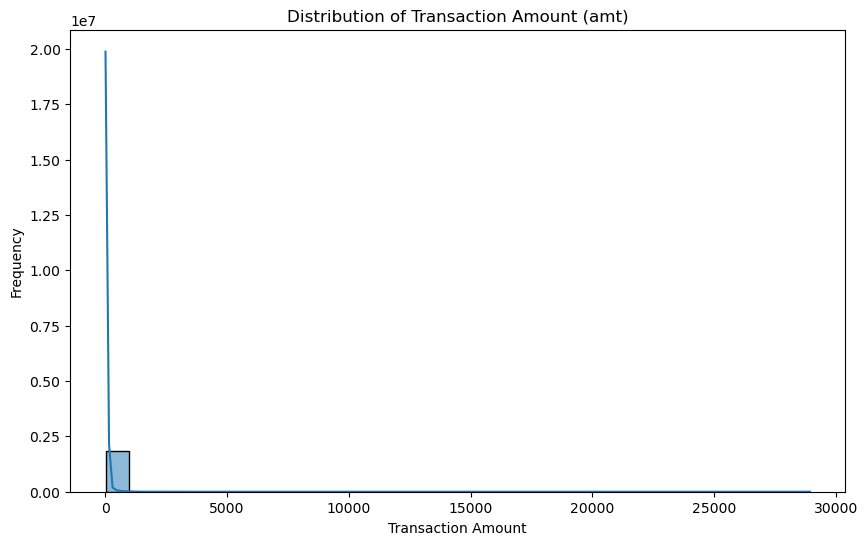

In [78]:
# Histogram of 'amt' (Transaction Amount)
plt.figure(figsize=(10, 6))
sns.histplot(data=df0, x='amt', bins=30, kde=True)
plt.title('Distribution of Transaction Amount (amt)')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

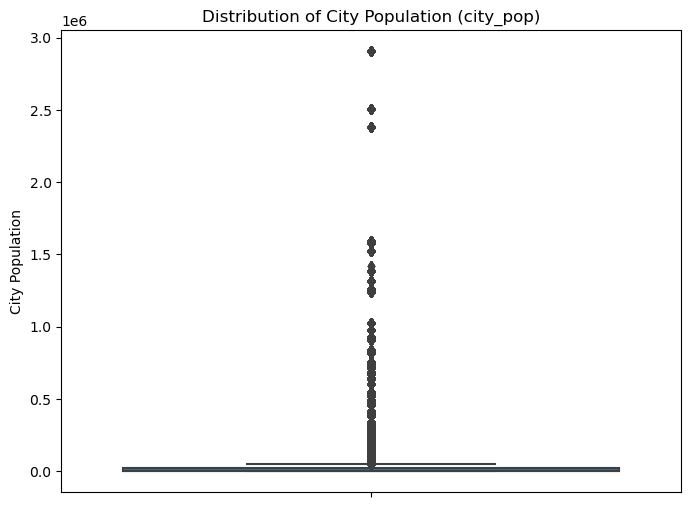

In [79]:
# Box plot of 'city_pop' (City Population)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df0, y='city_pop')
plt.title('Distribution of City Population (city_pop)')
plt.ylabel('City Population')
plt.show()

Distribution of Categorical Variables (`category`, `gender`, `time_of_day`, `age`):

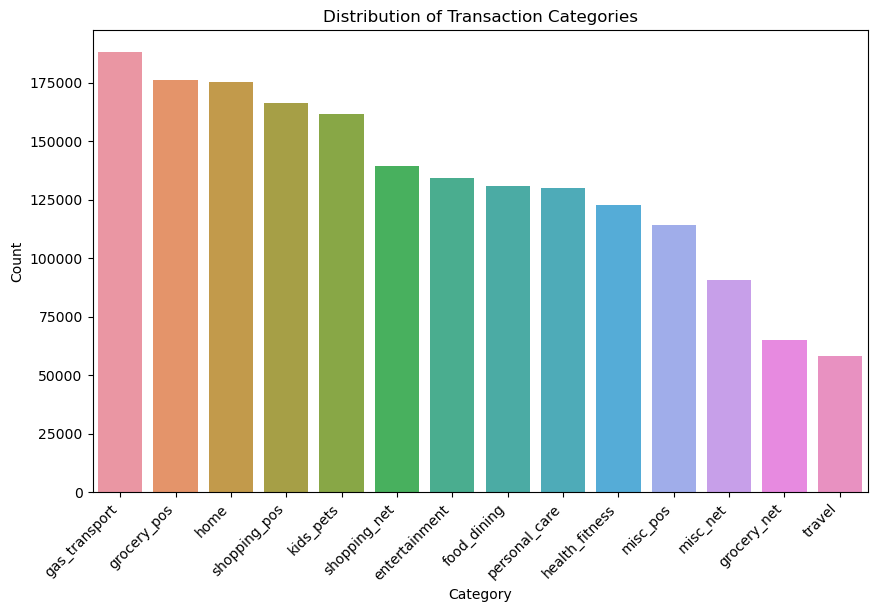

In [80]:
# Bar plot of 'category' (Transaction Category)
plt.figure(figsize=(10, 6))
sns.countplot(data=df0, x='category', order=df0['category'].value_counts().index)
plt.title('Distribution of Transaction Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

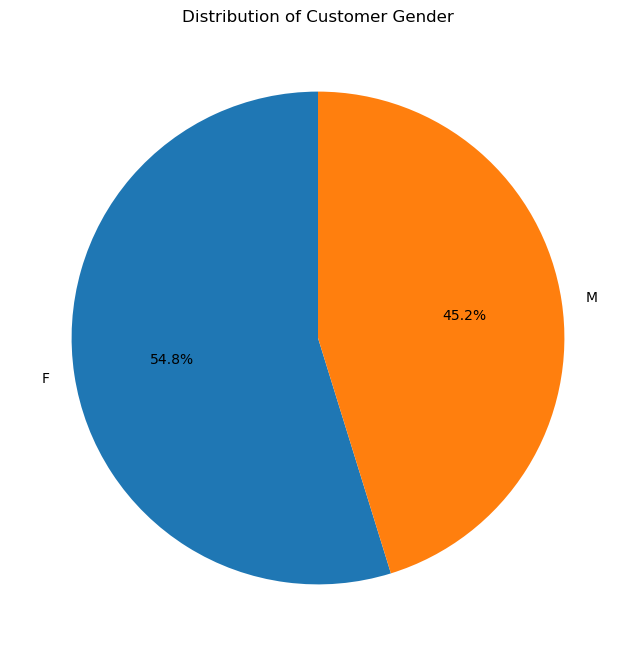

In [81]:
# Pie chart of 'gender' (users Gender)
plt.figure(figsize=(8, 8))
df0['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Customer Gender')
plt.ylabel('')
plt.show()

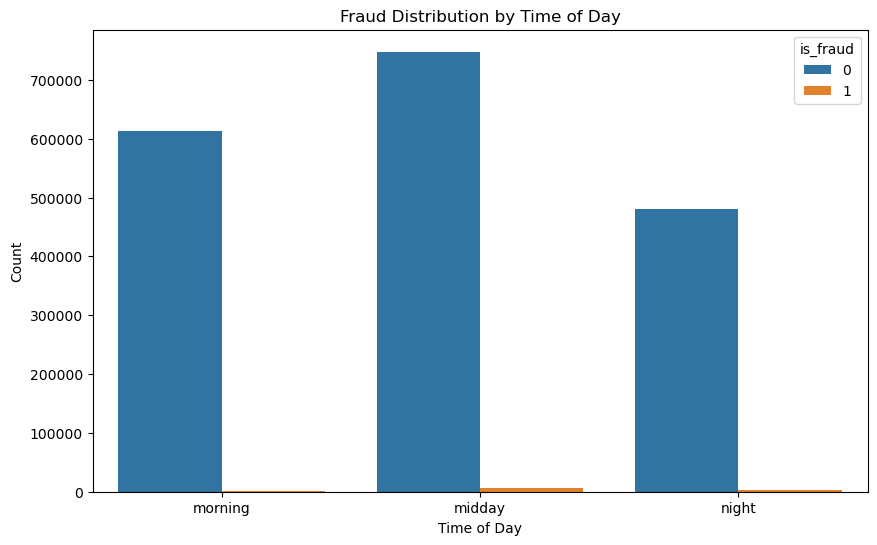

In [82]:
# Stacked bar plot of 'time_of_day' and 'is_fraud'
plt.figure(figsize=(10, 6))
sns.countplot(data=df0, x='time_of_day', hue='is_fraud', order=['morning', 'midday', 'night'])
plt.title('Fraud Distribution by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Count')
plt.legend(title='is_fraud')
plt.show()

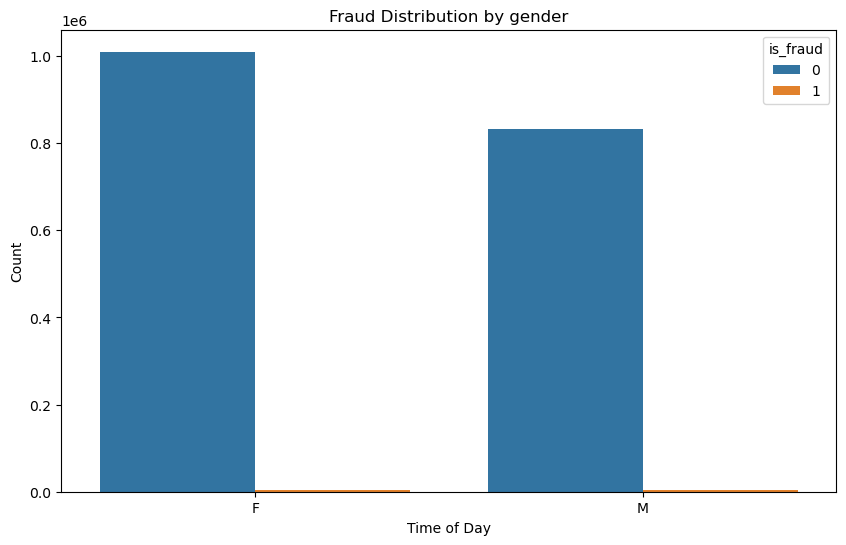

In [83]:
# Stacked bar plot of 'gender' and 'is_fraud'
plt.figure(figsize=(10, 6))
sns.countplot(data=df0, x='gender', hue='is_fraud')
plt.title('Fraud Distribution by gender')
plt.xlabel('Time of Day')
plt.ylabel('Count')
plt.legend(title='is_fraud')
plt.show()

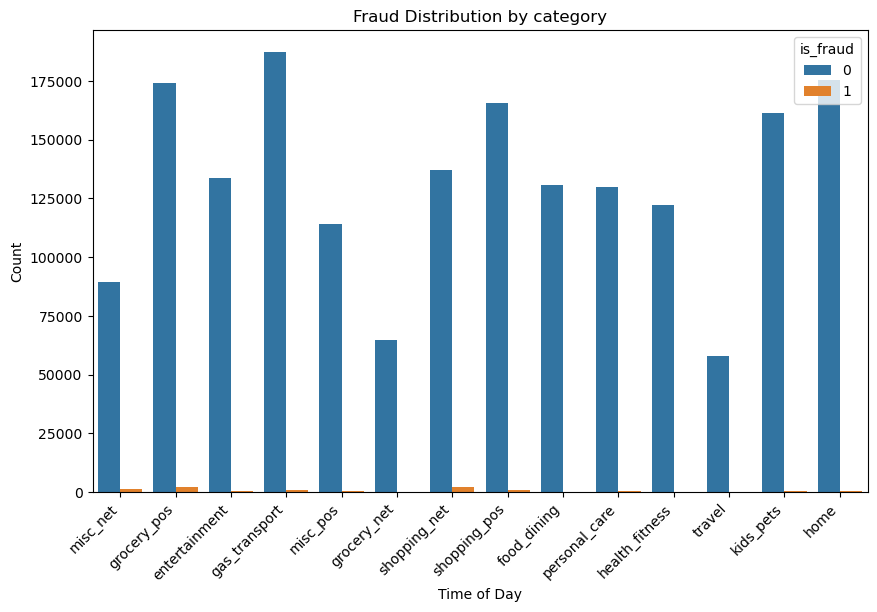

In [38]:
# Stacked bar plot of 'category' and 'is_fraud'
plt.figure(figsize=(10, 6))
sns.countplot(data=df0, x='category', hue='is_fraud')
plt.title('Fraud Distribution by category')
plt.xlabel('Time of Day')
plt.ylabel('Count')
plt.legend(title='is_fraud')
plt.xticks(rotation=45, ha='right')
plt.show()

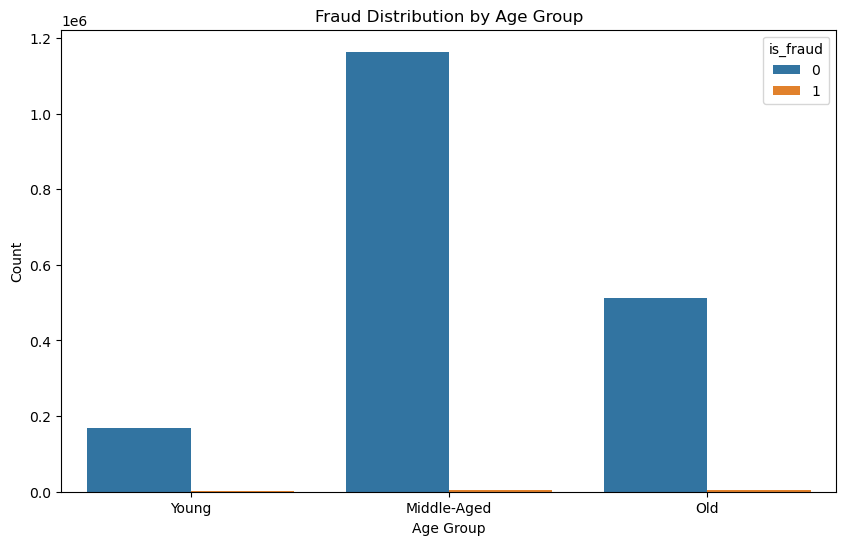

In [33]:
# Stacked bar plot of 'age' and 'is_fraud'
plt.figure(figsize=(10, 6))
sns.countplot(data=df0, x='age', hue='is_fraud', order=['Young', 'Middle-Aged', 'Old'])
plt.title('Fraud Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='is_fraud')
plt.show()

### Variable Encoding

now let's convert all categorical variables to numeric using get_dummies

In [84]:
df0 = pd.get_dummies(df0)

let's have a look at our final dataset

In [85]:
df0.head()

,amt,city_pop,is_fraud,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,...,category_shopping_pos,category_travel,gender_F,gender_M,time_of_day_midday,time_of_day_morning,time_of_day_night,age_Middle-Aged,age_Old,age_Young
0,4.97,3495,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
1,107.23,149,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,1,0,0
2,220.11,4154,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
3,45.00,1939,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
4,41.96,99,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0


### Check class balance

understanding how many customers are generous and how many are not generous

In [86]:
# Get number fraud transactions
df0['is_fraud'].value_counts()
# Get percentages of fraud transactions
df0['is_fraud'].value_counts(normalize = True) *100

0    99.478999
1     0.521001
Name: is_fraud, dtype: float64

<Axes: >

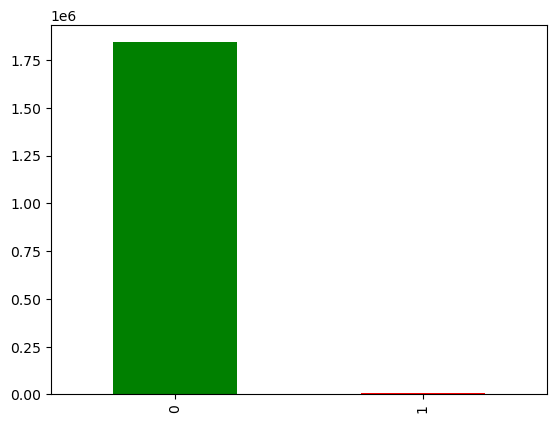

In [87]:
#visualizing class balance
df0['is_fraud'].value_counts().plot.bar(color=['green', 'red'])

oops , sounds like trouble , 99.47% of the `is_fraud` variable is non fraudlent(0) and the rest is fraudlent(1) , so this dataset is definitely not balanced , since we have a large number of observations , we will proceed with undersampling

In [88]:
from sklearn.utils import resample

# Separate majority and minority classes
majority_class = df0[df0['is_fraud'] == 0]
minority_class = df0[df0['is_fraud'] == 1]

# Downsample majority class
majority_downsampled = resample(majority_class, 
                                 replace=False,    # sample without replacement
                                 n_samples=len(minority_class),  # match minority class
                                 random_state=42)  # reproducible results

# Combine minority class with downsampled majority class
df0 = pd.concat([majority_downsampled, minority_class])


let's check the `is_fraud` balance again

In [89]:
df0['is_fraud'].value_counts()
df0['is_fraud'].value_counts(normalize = True) *100

0    50.0
1    50.0
Name: is_fraud, dtype: float64

In [90]:
df0.shape

(19302, 25)

# paCe: Construct Stage

## Step 3. Model Building

This is a classification task , since our target variable is categorical consisting of 0 and 1. 

we will proceed with three classifiers:
 - Random Forest
 - XGBOOST
 - Deep neural network (DNN)

### Modeling

In [91]:
# Identifying features and target variable
X = df0.drop(['is_fraud'] , axis = 1)
y = df0['is_fraud']

In [92]:
# Split dataset into training , validating holdout(test) datasets

#creating Training and testing sets
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size = 0.3 , stratify=y , random_state = 42)

#creating a validation set
X_tr , X_val , y_tr , y_val = train_test_split(X_train, y_train , test_size = 0.5,  stratify=y_train , random_state = 10)

Let's illustrate what we are doing here , simply we are splitting our dataset to training and testing set as normal , but we want to apply the **cross validation** technique , which means that we will train our model using the training data as normal , but we won't check the model accuracy on the test data , instead we will use our validation set to train all the models we are going to experiment.
now the question is what should be done with the test data 🤔 ????!
the test data will remain unseen until we finish building all the models , finally the champion model (the model with higher accuracy scores) will only be used to predict on the testing data 😎.
the following diagram illustrates the idea. 

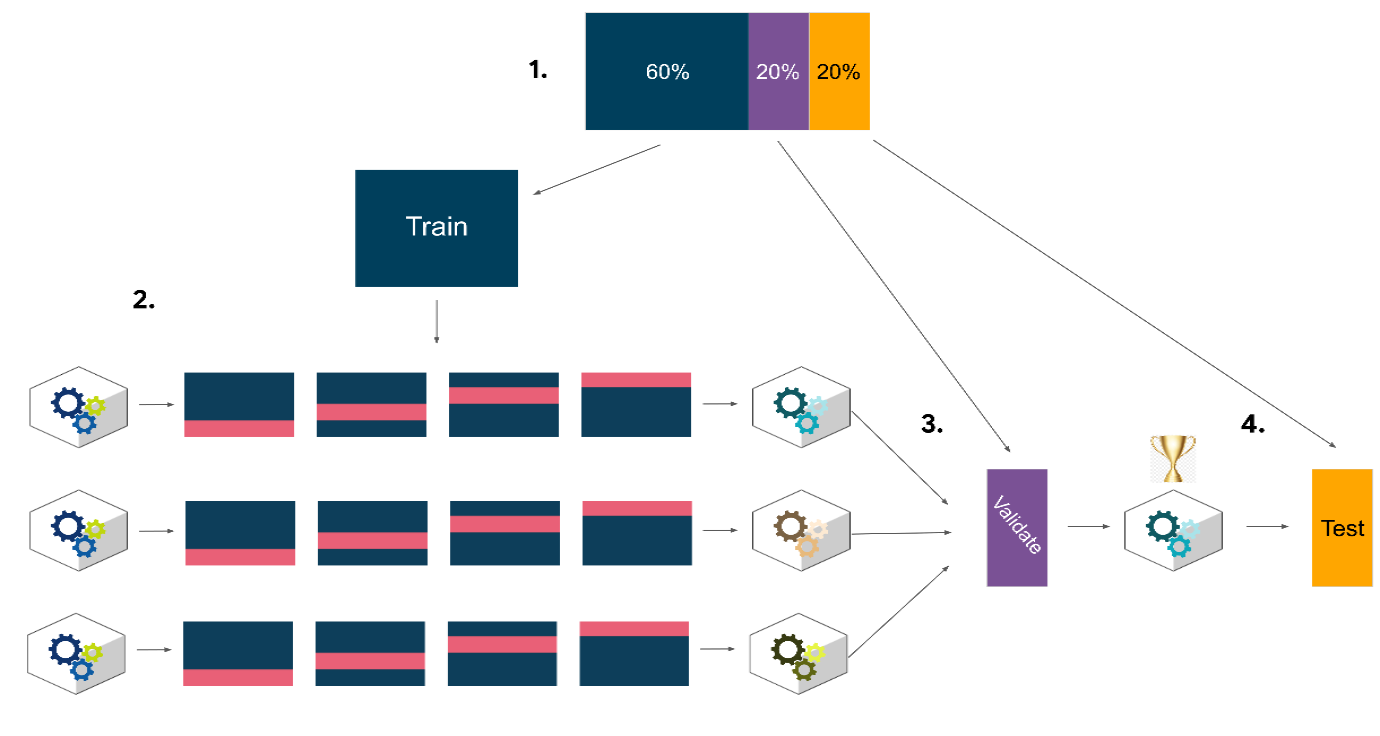

Note: it's not a must to split the data 60 20 20 , in our case here , we are splitting it to 70 15 15

## Experiment 1: Random Forest

In [93]:
# Instantiate random forest model.
rf = RandomForestClassifier()

#### We should first first identify the best Hyper paramaters for the classifier using GridSearch

In [94]:
# Determine set of hyperparameters for random forest
rf_cv_params = {'n_estimators' : [50,100 , 150 , 200], 
              'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50],
             'min_samples_leaf': [2, 5, 10, 20, 50],
             'min_samples_split': [2, 4, 6],
              'max_features' : ["sqrt"], 
              'max_samples' : [.5,.9]}

scores = ['accuracy', 'precision', 'recall', 'f1']

GridSearchCV wants to cross validate the data. In fact, if the CV parameter was left blank, it would split the data into five folds for cross-validation by default. Because we are using a separate validation set, it's important to explicitly tell the function how to perform the validation. This includes telling it every row in the training and testing sets. we will use a **list comprehension** to generate a list of the same length as our X_tr data, where each value is either a negative one or a zero. we used the list stored in the **split_index** variable to indicate to GridSearchCV that each row labeled negative 1 is in the training set and each row labeled as zero is in the validation set.

In [95]:
# Create list of split indices.
split_index = [0 if x in X_val.index else -1 for x in X_train.index]
custom_split = PredefinedSplit(split_index)

In [96]:
%%time 
rf_val = GridSearchCV(rf, rf_cv_params, cv= custom_split, scoring = scores ,  refit='f1', n_jobs = -1, verbose = 1)

# Fit the model
rf_val.fit(X_train , y_train)

Fitting 1 folds for each of 1680 candidates, totalling 1680 fits
CPU times: total: 7.92 s
Wall time: 1min 12s


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50],
                         'max_features': ['sqrt'], 'max_samples': [0.5, 0.9],
                         'min_samples_leaf': [2, 5, 10, 20, 50],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [50, 100, 150, 200]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'],
             verbose=1)

In [97]:
#getting the best paramaters to be used with Random forest
rf_val.best_params_

{'max_depth': 30,
 'max_features': 'sqrt',
 'max_samples': 0.9,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 200}

#### We are going to use the confusion matrix & accuracy measures to test the accuracy of each model we will create , so let's create a function that takes three arguments , model , x_data and y_data , to prevent code duplication

In [98]:
#creating a confusion matrix to identify how accurate our classifier is
def conf_matrix_plot(model, x_data, y_data):
    model_pred = model.predict(x_data) # Save predictions
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_) # Calculate the values for each quadrant in the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    disp.plot(values_format='')  # `values_format=''` this is written to prevent the numbers in the confusion matrix to appear in that form (1.5e+03) 
    plt.show()    
    
    #Accuracy reports
    report =    {"Accuracy" :accuracy_score(y_data, model_pred) , 
                "Precision": precision_score(y_data, model_pred),
                "Recall" : recall_score(y_data, model_pred) , 
                "F1 Score" : f1_score(y_data, model_pred)}
    for key , value  in report.items():
        print(f"{key}:{round(value , 3)}")

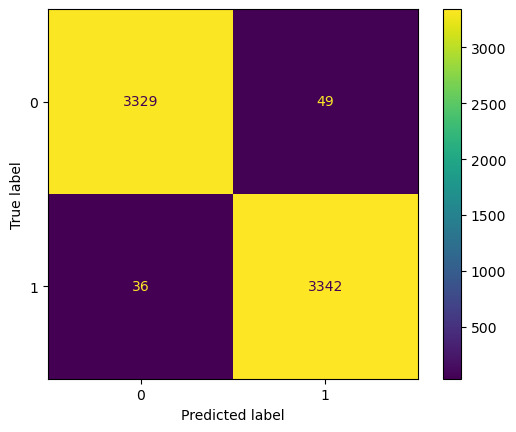

Accuracy:0.987
Precision:0.986
Recall:0.989
F1 Score:0.987


In [99]:
conf_matrix_plot(rf_val.best_estimator_, X_val, y_val)

## Experiment 2: Gradient boosting (XGBOOST)

#### In this experiment , let's use another tree-based ensemble model  ,  XGBOOST  

In [100]:
#Instantiate XGBOOST classifier
xgb = XGBClassifier(objective='binary:logistic')

In [101]:
# Determine set of hyperparameters for XGBOOST
xgb_cv_params = {'max_depth': [4,5,6,7,8,9,10,11,12,15,20,30,40,50],
              'min_child_weight': [3, 5 , 10 , 15 , 20 , 30 , 50 , 70 , 100],
              'learning_rate': [0.1, 0.2, 0.3 , 0.5 ,0.7 ,0.9],
              'n_estimators': [50,100 , 150 , 200],
              'subsample': [0.7],
              'colsample_bytree': [0.7]
              }

scores = ['accuracy','recall', 'f1' , 'precision']

In [102]:
%%time
xgb_cv = GridSearchCV(xgb,xgb_cv_params,scoring = scores,cv = custom_split ,refit = 'f1',n_jobs = -1, verbose = 1)

# Fit the model
xgb_cv.fit(X_train, y_train)

Fitting 1 folds for each of 3024 candidates, totalling 3024 fits
CPU times: total: 14.4 s
Wall time: 45.9 s


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,...
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.1, 0.2, 0.3, 0.5, 0.7, 0.9],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50],
                         'min_child_weight': [3, 5, 10, 15, 20, 30, 50, 70,
                                              100],
                         'n_estimators': [50, 100, 150, 200],
                         'subsample': [0.7]},
             refit='f1', scoring=['accuracy', 'recall', 'f1', 'precision'],
             verbose=1)

In [103]:
#getting the best paramaters to be used with XGBOOST
xgb_cv.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 30,
 'min_child_weight': 3,
 'n_estimators': 200,
 'subsample': 0.7}

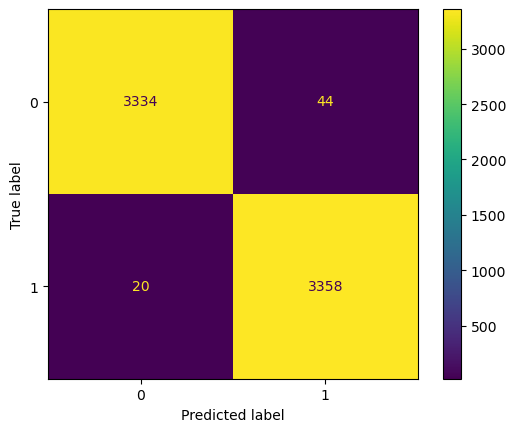

Accuracy:0.991
Precision:0.987
Recall:0.994
F1 Score:0.991


In [104]:
conf_matrix_plot(xgb_cv.best_estimator_, X_val, y_val)

## Experiment 3: Deep Neural Network (DNN)

In [105]:
# Define your deep neural network architecture
dnn = MLPClassifier()             

In [106]:
dnn_cv_params = {
   'hidden_layer_sizes':[50,75,100,150],  # Number of neurons in the hidden layers
    'activation': ['relu' , 'tanh'],  # Activation function
    'alpha': [1e-5, 1e-2],  # L2 regularization parameter
    'learning_rate_init': [1e-4, 1e-2],  # Initial learning rate
    'max_iter': [100, 200 , 300 , 400 , 500]  # Maximum number of iterations
}

scores = ['accuracy','recall', 'f1' , 'precision']

In [107]:
%%time
dnn_cv = GridSearchCV(dnn,dnn_cv_params ,scoring = scores,cv = custom_split ,refit = 'f1',n_jobs = -1, verbose = 1)

# Fit the model
dnn_cv.fit(X_train, y_train)

Fitting 1 folds for each of 160 candidates, totalling 160 fits
CPU times: total: 1.55 s
Wall time: 36.3 s


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'], 'alpha': [1e-05, 0.01],
                         'hidden_layer_sizes': [50, 75, 100, 150],
                         'learning_rate_init': [0.0001, 0.01],
                         'max_iter': [100, 200, 300, 400, 500]},
             refit='f1', scoring=['accuracy', 'recall', 'f1', 'precision'],
             verbose=1)

In [108]:
dnn_cv.best_params_

{'activation': 'relu',
 'alpha': 1e-05,
 'hidden_layer_sizes': 100,
 'learning_rate_init': 0.01,
 'max_iter': 300}

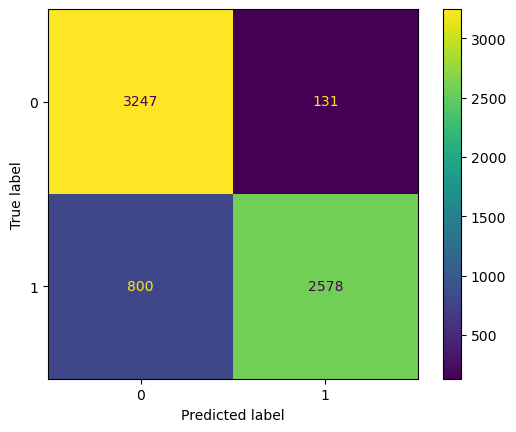

Accuracy:0.862
Precision:0.952
Recall:0.763
F1 Score:0.847


In [109]:
conf_matrix_plot(dnn_cv.best_estimator_, X_val, y_val)

# pacE: Execute Stage

## Step 4. Results and Evaluation

### Summary of model results

#### let's Compare all the alogtithms used together to identify the Champion model

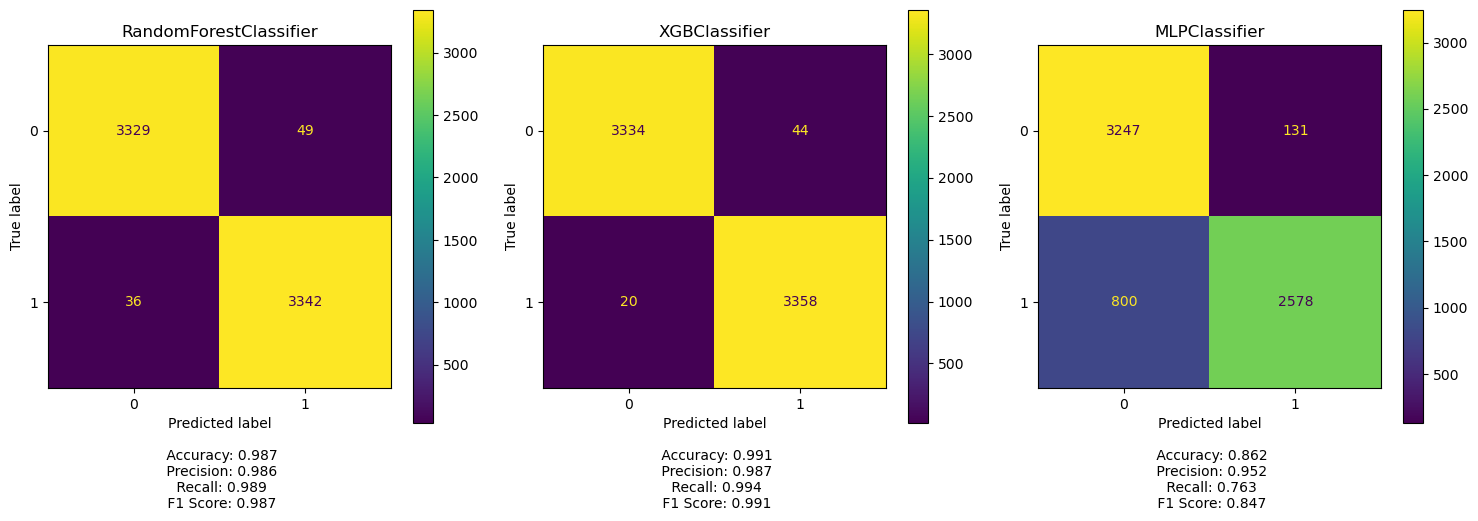

In [110]:
# Collecting our classifiers in a list
classifiers = [rf_val.best_estimator_, xgb_cv.best_estimator_ , dnn_cv.best_estimator_]

# Create a grid of subplots to compare the confusion matrices and accuracy measures
num_classifiers = len(classifiers)

fig, axes = plt.subplots(1, num_classifiers, figsize=(5 * num_classifiers, 5))

# Iterate over each classifier and display its confusion matrix along with its accuracy measures
for i, model in enumerate(classifiers):
    # Compute the confusion matrix
    y_pred = model.predict(X_val)
    cm = confusion_matrix(y_val, y_pred, labels=model.classes_)
    
    # Plot the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(ax=axes[i], values_format='')
    axes[i].set_title(model.__class__.__name__)  # Set the title to the classifier name
    
    # Compute accuracy measures
    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred)
    rec = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    
    # Add text annotations for accuracy measures
    textstr = f' \n \n \n \n \n Accuracy: {acc:.3f}\n Precision: {prec:.3f}\n Recall: {rec:.3f}\n F1 Score: {f1:.3f}'
    axes[i].text(0.5, -0.15, textstr, horizontalalignment='center', verticalalignment='center', transform=axes[i].transAxes)

plt.tight_layout()
plt.show()


# By comparing the results of the three classifiers used , the champion model with f1-score 0.991 ,  is **XGBOOST** 🏆🥇

Now let's evaluate the champion model on the unseen test set

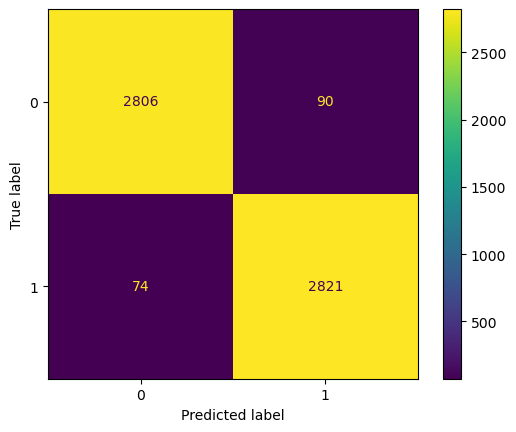

Accuracy:0.972
Precision:0.969
Recall:0.974
F1 Score:0.972


In [111]:
conf_matrix_plot(xgb_cv.best_estimator_, X_test, y_test)

That's Great , the f1_score is accepted 😎⭐

### Key insights

- The histogram of transaction amounts (amt) shows a right-skewed distribution, indicating that most transactions are of smaller amounts, with a few high-value transactions.

- The bar plot of transaction categories shows that top trasnactions came from gas_transport , grocery stores , and home appliances

- The pie chart of user gender indicates that most transactions are done by females.

- The stacked bar plot of fraud status (is_fraud) by time of day (time_of_day) shows that most fraudlent transactions occured on midday (from 4:pm to 11:pm)

- The stacked bar plot of fraud status (is_fraud) by category (category) shows that most fraudlent transactions came from online shopping and grocery stores

- The fraud distribution by age stacked bar plot showed that middle aged citizens (between 30 and 59 years) performed most of the fraudlent transactions

### Conclusion &  Recommendations

- Increase fraud detection systems in online shopping and grocery stores
- verify  persons holding credit cards before performing transactions , specially middle aged persons.
- keep an eye on small transactions , as most of fraudlent transactions come from small amounts